In [1]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
from pyproj import CRS

In [4]:
newdata = gpd.GeoDataFrame()
newdata['geometry'] = None
print(newdata)

Empty GeoDataFrame
Columns: [geometry]
Index: []


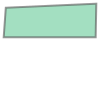

In [5]:
coordinates = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon(coordinates)
poly

In [7]:
newdata.at[0, 'geometry'] = poly
newdata.at[0, 'location'] = 'Senaatintori'
newdata

,geometry,location
0,"POLYGON ((24.95090 60.16916, 24.95349 60.16916...",Senaatintori


In [8]:
print(newdata.crs)

None


In [9]:
newdata.crs = CRS.from_epsg(4326).to_wkt()
newdata.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
outfp = "L2_data/Senaatintori_epsg_4326.shp"
newdata.to_file(outfp)

In [17]:
senaaintori = gpd.read_file(outfp)

In [18]:
senaaintori

,location,geometry
0,Senaatintori,"POLYGON ((24.95090 60.16916, 24.95096 60.16999..."


In [19]:
senaaintori = senaaintori.to_crs(epsg=3067)

In [20]:
senaaintori

,location,geometry
0,Senaatintori,"POLYGON ((386302.115 6672014.183, 386308.263 6..."


In [21]:
outfp = "L2_data/Senaatintori_epsg_3067.shp"
senaaintori.to_file(outfp)